## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

# Reads the bitstamp csv file and converts to a DataFrame 
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"),index_col="Timestamp",parse_dates=True,infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

# Displays the first 5 rows of the DataFrame
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

# Reads the coinbase csv file and converts to a DataFrame
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"),index_col="Timestamp",parse_dates=True,infer_datetime_format=True)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

# Displays the first 5 rows of the DataFrame
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

# Deletes all NaN or missing values in bitstamp DataFrame
bitstamp_prepped = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Uses the str.replace function to remove the dollar sign, $
bitstamp_prepped.loc[:,"Close"] = bitstamp_prepped.loc[:,"Close"].str.replace("$","")


/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Converts the Close data type to a float
bitstamp_prepped.loc[:,"Close"] = bitstamp_prepped.loc[:,"Close"].astype("float")



### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary

# Checks for the number of duplicate values
bitstamp_prepped.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeats Steps 1–4 for the coinbase DataFrame
coinbase_prepped = coinbase.dropna()
coinbase_prepped.loc[:,"Close"] = coinbase_prepped.loc[:,"Close"].str.replace("$","")
coinbase_prepped.loc[:,"Close"] = coinbase_prepped.loc[:,"Close"].astype("float")
coinbase_prepped.duplicated().sum()

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [12]:
# Uses loc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp_prepped.loc[:,"Close"])

# Reviews the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [13]:
# Uses loc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase_prepped.loc[:,"Close"])

# Reviews the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [14]:
# Generates the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [15]:
# Generates the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

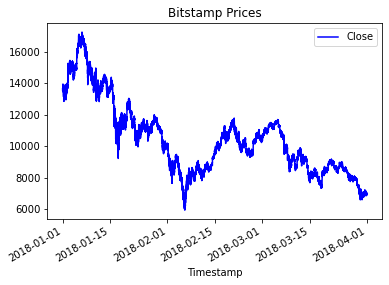

In [16]:
# Creates a line plot for the bitstamp DataFrame for the full length of time in the dataset 

bitstamp_sliced.plot(figsize=(6,4),title="Bitstamp Prices",color="blue")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

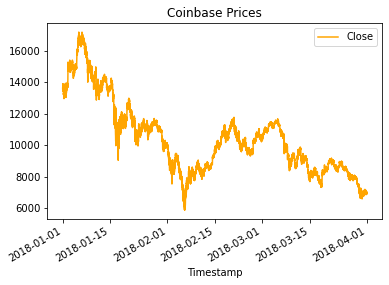

In [17]:
# Creates a line plot for the coinbase DataFrame for the full length of time in the dataset 

coinbase_sliced.plot(figsize=(6,4),title="Coinbase Prices",color="orange")

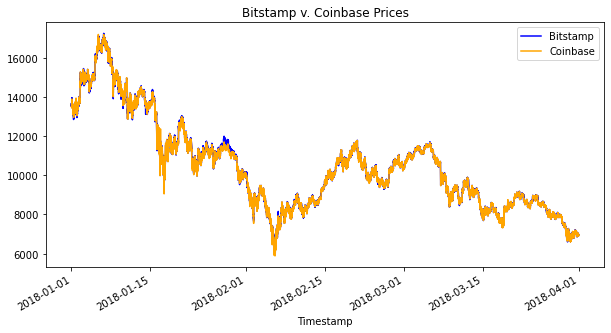

In [34]:
# Overlays the visualizations for the bitstamp and coinbase DataFrames in one plot

fig = bitstamp_sliced.plot(legend=True,figsize=(10,5),title="Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.plot(legend=True,figsize=(10,5),color="orange",label="Coinbase",ax=fig)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
fig.legend(labels=labels)

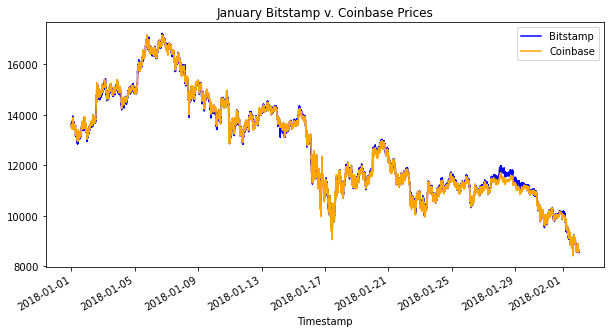

In [36]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

# Creates an overlay plot that visualizes the price action of both DataFrames for the month of January
ax=bitstamp_sliced.loc["2018-01-01":"2018-02-01"].plot(legend=True,figsize=(10,5),title="January Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.loc["2018-01-01":"2018-02-01"].plot(legend=True,figsize=(10,5),color="orange",label="Coinbase",ax=ax)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
ax.legend(labels=labels)

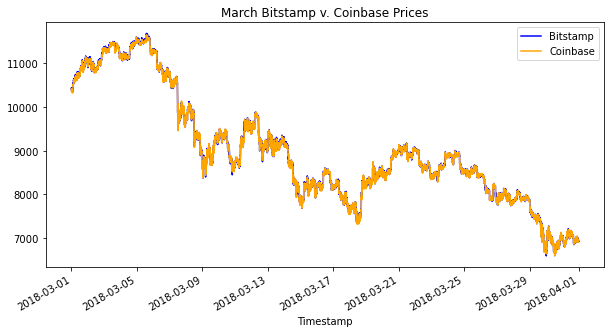

In [38]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

# Creates an overlay plot that visualizes the price action of both DataFrames for the month of March
ax=bitstamp_sliced.loc["2018-03-01":"2018-04-01"].plot(legend=True,figsize=(10,5),title="March Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.loc["2018-03-01":"2018-04-01"].plot(legend=True,figsize=(10,5),color="orange",label="Coinbase",ax=ax)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
ax.legend(labels=labels)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It doesn not appear that the degree of spread has changed as time progressed (minus a brief period at the end of Jauary where the spread was larger than normal).

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

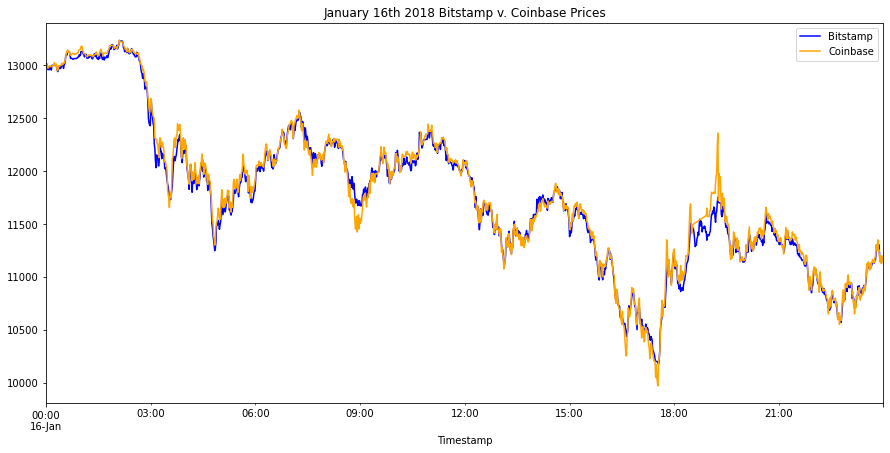

In [43]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Creates an overlay plot that visualizes the price action of both DataFrames on 01-16-2018
ax=bitstamp_sliced.loc["2018-01-16"].plot(legend=True,figsize=(15,7),title="January 16th 2018 Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.loc["2018-01-16"].plot(legend=True,figsize=(15,7),color="orange",label="Coinbase",ax=ax)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
ax.legend(labels=labels)

In [44]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

#Calculates the arbitrage spread for 01-16-2018
arbitrage_spread_early = coinbase_sliced["2018-01-16"]-bitstamp_sliced["2018-01-16"]

# Generates summary statistics for the early DataFrame
arbitrage_spread_early.describe()

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


,Close
count,1419.000000
mean,23.212135
std,67.789186
min,-275.920000
25%,-8.330000
50%,22.280000
75%,52.355000
max,606.800000


<AxesSubplot:>

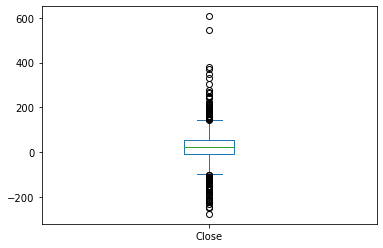

In [45]:
# Visualizes the arbitrage spread on 01-16-2018 in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

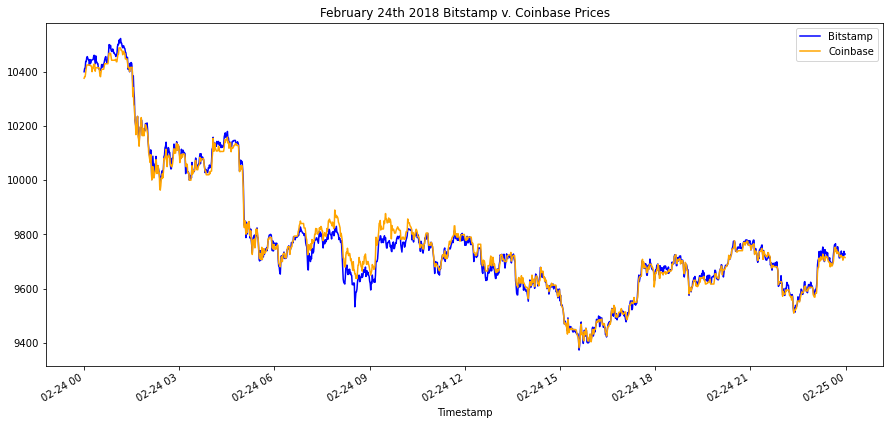

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Creates an overlay plot that visualizes the price action of both DataFrames on 02-24-2018
ax=bitstamp_sliced.loc["2018-02-24"].plot(legend=True,figsize=(15,7),title="February 24th 2018 Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.loc["2018-02-24"].plot(legend=True,figsize=(15,7),color="orange",label="Coinbase",ax=ax)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
ax.legend(labels=labels)

In [47]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

#Calculates the arbitrage spread on 02-24-2018
arbitrage_spread_middle = coinbase_sliced["2018-02-24"]-bitstamp_sliced["2018-02-24"]

# Generates summary statistics 
arbitrage_spread_middle.describe()

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


,Close
count,1437.000000
mean,3.396131
std,22.969472
min,-50.180000
25%,-10.590000
50%,-0.010000
75%,12.120000
max,121.320000


<AxesSubplot:>

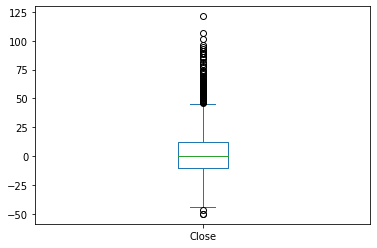

In [48]:
# Visualizes the arbitrage spread on 02-24-2018 for the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

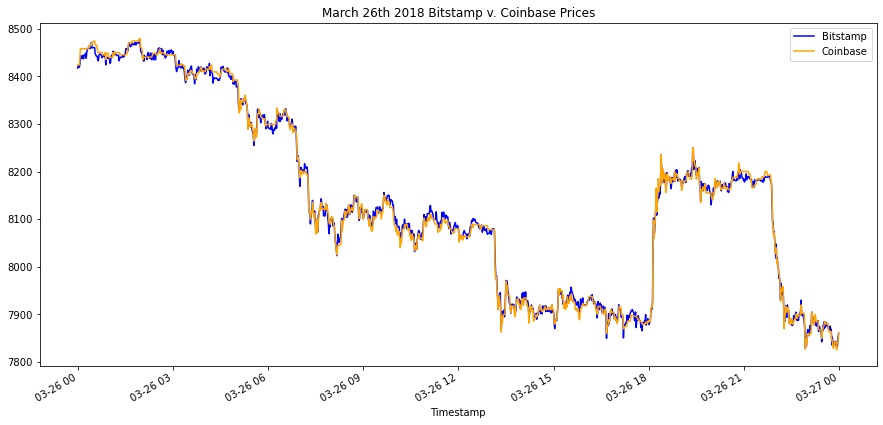

In [49]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Creates an overlay plot that visualizes the price action of both DataFrames on 03-26-2018
ax=bitstamp_sliced.loc["2018-03-26"].plot(legend=True,figsize=(15,7),title="March 26th 2018 Bitstamp v. Coinbase Prices",color="blue",label="Bitstamp")
coinbase_sliced.loc["2018-03-26"].plot(legend=True,figsize=(15,7),color="orange",label="Coinbase",ax=ax)
#Creates labels for the legend
labels = ["Bitstamp","Coinbase"]
ax.legend(labels=labels)

In [50]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

#Calculates the arbitrage spread on 03-26-2018
arbitrage_spread_late = coinbase_sliced["2018-03-26"]-bitstamp_sliced["2018-03-26"]

# Generates summary statistics for the late DataFrame
arbitrage_spread_late.describe()

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


,Close
count,1432.000000
mean,-0.722193
std,8.523060
min,-32.040000
25%,-6.812500
50%,-0.730000
75%,4.965000
max,35.070000


<AxesSubplot:>

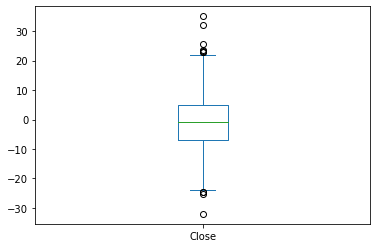

In [51]:
# Visualizes the arbitrage spread on 03-26-2018 in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [52]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced["2018-01-16"]-bitstamp_sliced["2018-01-16"]
# Filters the january date data for spreads greater than 0
arbitrage_spread_positive_early = arbitrage_spread_early[arbitrage_spread_early > 0]
# Filters the february date data for spreads greater than 0
arbitrage_spread_positive_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
# Filters the march date data for spreads greater than 0
arbitrage_spread_positive_late = arbitrage_spread_late[arbitrage_spread_late > 0]

# Generates the summary statistics for each filtered arbitrage_spread DataFrame
display(arbitrage_spread_positive_early.describe())
display(arbitrage_spread_positive_middle.describe())
display(arbitrage_spread_positive_late.describe())


/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
count,960.000000
mean,53.405344
std,53.910409
min,0.010000
25%,21.602500
50%,39.885000
75%,68.547500
max,606.800000


,Close
count,713.000000
mean,19.880351
std,20.699851
min,0.010000
25%,5.040000
50%,12.330000
75%,27.250000
max,121.320000


,Close
count,651.000000
mean,6.689247
std,5.240159
min,0.010000
25%,2.835000
50%,5.230000
75%,9.195000
max,35.070000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [53]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# calculates the spread returns for each date by dividing the instances when the arbitrage spread is positive (> 0)
spread_return_early = arbitrage_spread_positive_early / bitstamp_sliced["2018-01-16"]
spread_return_middle = arbitrage_spread_positive_middle / bitstamp_sliced["2018-02-24"]
spread_return_late = arbitrage_spread_positive_late / bitstamp_sliced["2018-03-26"]
# Drops any missing or NaN values from the spread return data
spread_return_early = spread_return_early.dropna()
spread_return_middle = spread_return_middle.dropna()
spread_return_late = spread_return_late.dropna()

# Reviews the spread return DataFrame
display(spread_return_early)
display(spread_return_middle)
display(spread_return_late)

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  import sys


,Close
Timestamp,
2018-01-16 00:02:00,0.000731
2018-01-16 00:03:00,0.001108
2018-01-16 00:04:00,0.000909
2018-01-16 00:05:00,0.002485
2018-01-16 00:06:00,0.001665
...,...
2018-01-16 23:47:00,0.005847
2018-01-16 23:49:00,0.000921
2018-01-16 23:50:00,0.004076


,Close
Timestamp,
2018-02-24 00:10:00,0.000123
2018-02-24 00:27:00,0.000189
2018-02-24 00:28:00,0.000487
2018-02-24 01:23:00,0.000574
2018-02-24 01:24:00,0.000163
...,...
2018-02-24 23:20:00,0.000253
2018-02-24 23:47:00,0.000179
2018-02-24 23:48:00,0.000846


,Close
Timestamp,
2018-03-26 00:00:00,0.000738
2018-03-26 00:01:00,0.000122
2018-03-26 00:02:00,0.000470
2018-03-26 00:03:00,0.000576
2018-03-26 00:04:00,0.001395
...,...
2018-03-26 23:46:00,0.001146
2018-03-26 23:53:00,0.000819
2018-03-26 23:54:00,0.000879


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [54]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

# determines the number of times for each date that your trades with positive returns exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
# Drops any missing or NaN values from the spread return data
profitable_trades_early = profitable_trades_early.dropna()
profitable_trades_middle = profitable_trades_middle.dropna()
profitable_trades_late = profitable_trades_late.dropna()

# Reviews the first five profitable trades for each date
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

,Close
Timestamp,
2018-01-16 02:56:00,0.012962
2018-01-16 02:57:00,0.010838
2018-01-16 02:59:00,0.014171
2018-01-16 03:00:00,0.010675
2018-01-16 03:06:00,0.019704


,Close
Timestamp,
2018-02-24 08:32:00,0.012726
2018-02-24 09:32:00,0.010974
2018-02-24 09:39:00,0.010431


,Close
Timestamp,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [55]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

# Generates summary statistics for the profitable trades for each date
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

,Close
count,73.000000
mean,0.016720
std,0.007628
min,0.010109
25%,0.012061
50%,0.014794
75%,0.018124
max,0.051633


,Close
count,3.000000
mean,0.011377
std,0.001199
min,0.010431
25%,0.010703
50%,0.010974
75%,0.011850
max,0.012726


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [56]:
# For the each date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced["2018-01-16"]
profit_middle = profitable_trades_middle * bitstamp_sliced["2018-02-24"]
profit_late = profitable_trades_late * bitstamp_sliced["2018-03-26"]
# Drops any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()
# Views the early profit DataFrame
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.
/Users/robbyodum/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future ve

,Close
Timestamp,
2018-01-16 02:56:00,162.01
2018-01-16 02:57:00,135.00
2018-01-16 02:59:00,176.13
2018-01-16 03:00:00,134.01
2018-01-16 03:06:00,241.54
...,...
2018-01-16 19:23:00,125.09
2018-01-16 19:26:00,131.78
2018-01-16 19:38:00,124.01


,Close
Timestamp,
2018-02-24 08:32:00,121.32
2018-02-24 09:32:00,107.00
2018-02-24 09:39:00,101.75


,Close
Timestamp,


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [57]:
# Generates the summary statistics for each date's profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

,Close
count,73.000000
mean,193.796849
std,88.701429
min,112.520000
25%,139.420000
50%,171.310000
75%,210.060000
max,606.800000


,Close
count,3.000000
mean,110.023333
std,10.129246
min,101.750000
25%,104.375000
50%,107.000000
75%,114.160000
max,121.320000


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


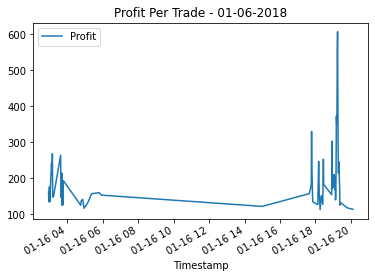

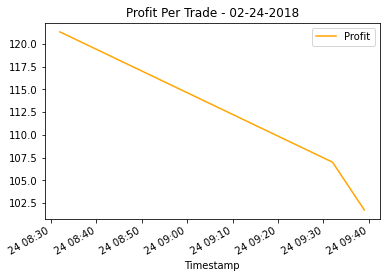

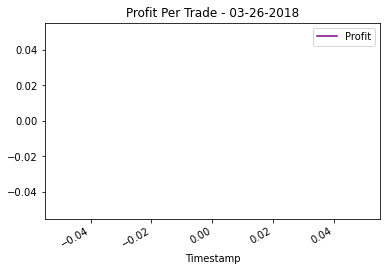

In [76]:
#Creates label for the legends of each graph
labels=["Profit"]
# Plots the results for each date's profit per trade DataFrame
ax1=profit_per_trade_early.plot(title="Profit Per Trade - 01-06-2018").legend(labels=labels)
ax2=profit_per_trade_middle.plot(title="Profit Per Trade - 02-24-2018",color="orange").legend(labels=labels)
ax3=profit_per_trade_late.plot(title="Profit Per Trade - 03-26-2018",color="purple").legend(labels=labels)



#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [69]:
# Calculates the sum of the potential profits for each date's profit per trade DataFrame
display(profit_per_trade_early.sum())
display(profit_per_trade_middle.sum())
display(profit_per_trade_late.sum())

Close    14147.17
dtype: float64

Close    330.07
dtype: float64

Close    0.0
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [70]:
# Uses the cumsum function to calculate the cumulative profits over time for each date's profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

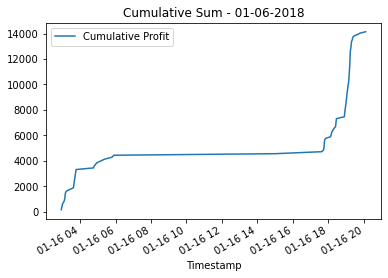

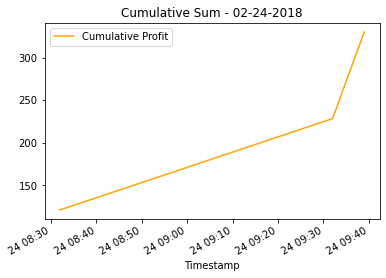

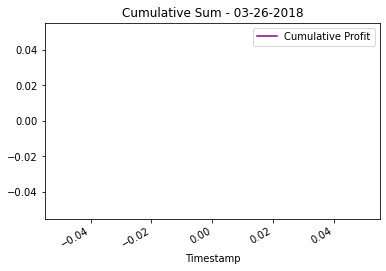

In [74]:
# Creates labels for the plots' legends
labels=["Cumulative Profit"]
# Plots the cumulative sum of profits for each date's profit per trade DataFrame
cumulative_profit_early.plot(title="Cumulative Sum - 01-06-2018").legend(labels=labels)
cumulative_profit_middle.plot(title="Cumulative Sum - 02-24-2018",color="orange").legend(labels=labels)
cumulative_profit_late.plot(title="Cumulative Sum - 03-26-2018",color="purple").legend(labels=labels)

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Earlier in the year seems to be the greatest potential to profit from this arbitrage strategy. There are 73 winning trades on the January date with a total potential profit of 14147.17(refer to table 1, row 1), only 3 winning trades on the February date with a total potential profit of 330.07(refer to table 1, row 3), and 0 winning trades by the time we get to the March date (refer to table 1, row 5). Additionally, it appears that the most arbitrage opportunities presented themsleves either in the morning or evening, with all successful February date trades occuring between 8:30am and 9:45am (refer to graph 1) and very little opportunity midday and into the afternoon even on the more successful arbitrage January trading date (refer to graph 2). There was also the potential for the greatest profit earlier in the year with there being both the greatest standard deviation on the January date of 88.70 and the highest single trade return of 606.80 (refer to table 2) compared to February's highest return of 121.32 (refer to table 3). By the time March 2018 comes around, there seems to be very little, if any, opportunity available for profitable arbitrage trading left. 

**Table 1 - Total Profits for January, February, and March Date**

![Table_1](./Images/Table_1.png/)

**Table 2 - January Date Summary Statistics**

![Table_2](./Images/Table_2.png/)

**Table 3 - February Date Summary Statistics**

![Table_3](./Images/Table_3.png/)

**Graph 1 - February Date Cumulative Sum Graph**

![Graph1](./Images/Graph_1.png/)

**Graph 2 - January Date Cumulative Sum Graph**

![Graph2](./Images/Graph_2.png/)
